In [ ]:
#! pip install astroNN
#! pip install tensorflow
#! pip install tensorflow_probability
#! pip install git+https://github.com/henrysky/astroNN.git
#import tensorflow as tf
#import matplotlib.pyplot as plt
#import pandas as pd
#import seaborn as sns
#import numpy as np
#from tensorflow import keras

#from keras.models import Sequential
#from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout
#from keras.callbacks import ReduceLROnPlateau
#from keras.optimizers import Adam

#import sklearn
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import classification_report,confusion_matrix
#from tensorflow.keras import utils

#from astroNN.datasets import galaxy10
#from astroNN.datasets.galaxy10 import galaxy10cls_lookup

In [ ]:
#images, labels = galaxy10.load_data()

#x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.01)

#features = ['Disk, Face-on, No Spiral', 'Smooth, Completely round', 'Smooth, in-between round', 'Smooth, Cigar shaped', 'Disk, Edge-on, Rounded Bulge', 'Disk, Edge-on, Boxy Bulge',
   #         'Disk, Edge-on, No Bulge','Disk, Face-on, Tight Spiral', 'Disk, Face-on, Medium Spiral', 'Disk, Face-on, Loose Spiral']

#x_train = x_train / 255.0
#x_test = x_test / 255.0

In [ ]:
#      x_train.shape, x_test.shape
# This prints ((17428, 69, 69, 3), (4357, 69, 69, 3))

In [ ]:
#fig = plt.figure(figsize=(20,20))

#for i in range(25):
 #   plt.subplot(5,5,i+1)
 #   plt.imshow(x_train[i])
 #   plt.title(features[y_train[i]])
 #   fig.tight_layout(pad=3.0)

#plt.show()

In [ ]:
# Check class distribution

#df = pd.DataFrame(data=labels)

#counts = df.value_counts().sort_index()
#print(counts)

In [ ]:
#def class_distribution(x, y, labels):
 #   fig, ax = plt.subplots()
 #   ax.bar(x, y)
  #  ax.set_xticklabels(labels, rotation=90)
  #  plt.show()

#class_distribution(features, counts, features)

In [ ]:
#model = Sequential()

# Baseline model to compare to LeNet-5
#model.add(Flatten(input_shape=(69, 69, 3)))
#model.add(Dense(128, activation='relu'))
#model.add(Dense(10, activation='softmax'))

#model_optimizer = Adam(lr=0.001)

#model.compile(optimizer=model_optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])
#reduceLR = ReduceLROnPlateau(monitor='accuracy', factor=.001, patience=1, min_delta=0.01, mode="auto")
#lol = model.fit(x_train, y_train, epochs=10, callbacks=[reduceLR])

In [ ]:
#model2 = Sequential()

# LeNet-5 conv-net architecture
#model2.add(Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), activation='tanh', input_shape=(69,69,3)))
#model2.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))
#model2.add(Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='tanh'))
#model2.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))

#model2.add(Flatten())
#model2.add(Dense(units=120, activation='tanh'))
#model2.add(Dense(units=84, activation='tanh'))
#model2.add(Dense(units=10, activation='softmax'))

#model_optimizer = Adam(lr=0.001)

#reduceLR = ReduceLROnPlateau(monitor='accuracy', factor=.001, patience=1, min_delta=0.01, mode="auto")

#model2.compile(optimizer=model_optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])
#model2.fit(x_train, y_train, epochs=10, callbacks=[reduceLR])

In [ ]:
##predict = model2.predict(x_test).argmax(axis=1)

#for i in range(10):
 #   print("Actual:", features[y_test[i]])
 #   print("Prediction:", features[np.argmax(predict[i])])
 #  print("-----")
  #  print()

In [ ]:
#classification_report(y_test, predict)

In [ ]:
#matrix = confusion_matrix(y_test, predict)
#sns.heatmap(matrix, annot=True)
#plt.title('Galaxy Confusion Matrix')
#plt.xlabel('Predicted class')
#plt.ylabel('True class')

In [ ]:
!pip install -q astroNN
!pip install -q tensorflow
!pip install -q tensorflow_probability
!pip install -q git+https://github.com/henrysky/astroNN.git

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from astroNN.datasets import galaxy10
from tensorflow.image import resize

# Function to generate batches
def generate_batches(x, y, batch_size):
    num_samples = len(x)
    num_batches = num_samples // batch_size

    while True:
        # Shuffle the data for each epoch
        indices = np.arange(num_samples)
        np.random.shuffle(indices)

        for batch_index in range(num_batches):
            batch_start = batch_index * batch_size
            batch_end = (batch_index + 1) * batch_size
            batch_indices = indices[batch_start:batch_end]

            yield x[batch_indices], y[batch_indices]

# Assuming you have a function to load your data (replace this with your actual data loading function)
def load_data():
    # ... your data loading logic here
    return images, labels

# Load data using batches
images, labels = load_data()

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.01, random_state=42)

# Resize training images to the expected input shape
x_train_resized = np.array([resize(image, (69, 69)).numpy() for image in x_train])

# Normalize pixel values
x_train_resized = x_train_resized / 255.0

# Define the features list
features = ['Disk, Face-on, No Spiral', 'Smooth, Completely round', 'Smooth, in-between round', 'Smooth, Cigar shaped', 'Disk, Edge-on, Rounded Bulge', 'Disk, Edge-on, Boxy Bulge',
            'Disk, Edge-on, No Bulge','Disk, Face-on, Tight Spiral', 'Disk, Face-on, Medium Spiral', 'Disk, Face-on, Loose Spiral']

# Display sample resized images with labels
fig_resized = plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train_resized[i])
    plt.title(features[y_train[i]])
    fig_resized.tight_layout(pad=3.0)
plt.show()

# Use the resized training data for the baseline model
model = Sequential()
model.add(Flatten(input_shape=(69, 69, 3)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model_optimizer = Adam(learning_rate=0.001)  # Fix for the warning
model.compile(optimizer=model_optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])
reduceLR = ReduceLROnPlateau(monitor='accuracy', factor=.001, patience=1, min_delta=0.01, mode="auto")
lol = model.fit(x_train_resized, y_train, epochs=10, callbacks=[reduceLR])

# LeNet-5 model
model2 = Sequential()
model2.add(Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(69, 69, 3)))
model2.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation='tanh'))
model2.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(Flatten())
model2.add(Dense(units=64, activation='tanh'))
model2.add(Dense(units=10, activation='softmax'))

model_optimizer = Adam(learning_rate=0.001)  # Fix for the warning
reduceLR = ReduceLROnPlateau(monitor='accuracy', factor=.001, patience=1, min_delta=0.01, mode="auto")

model2.compile(optimizer=model_optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])

# Use the data generator for training
batch_size = 16
model2.fit(generate_batches(x_train_resized, y_train, batch_size), steps_per_epoch=len(x_train_resized) // batch_size, epochs=10, callbacks=[reduceLR])

# Use the data generator for testing
test_data_generator = generate_batches(x_test, y_test, batch_size)
predict = model2.predict(test_data_generator).argmax(axis=1)

for i in range(10):
    print("Actual:", features[y_test[i]])
    print("Prediction:", features[np.argmax(predict[i])])
    print("-----")
    print()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 909.7/909.7 kB 49.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


NameError: name 'images' is not defined

  Preparing metadata (setup.py) ... done


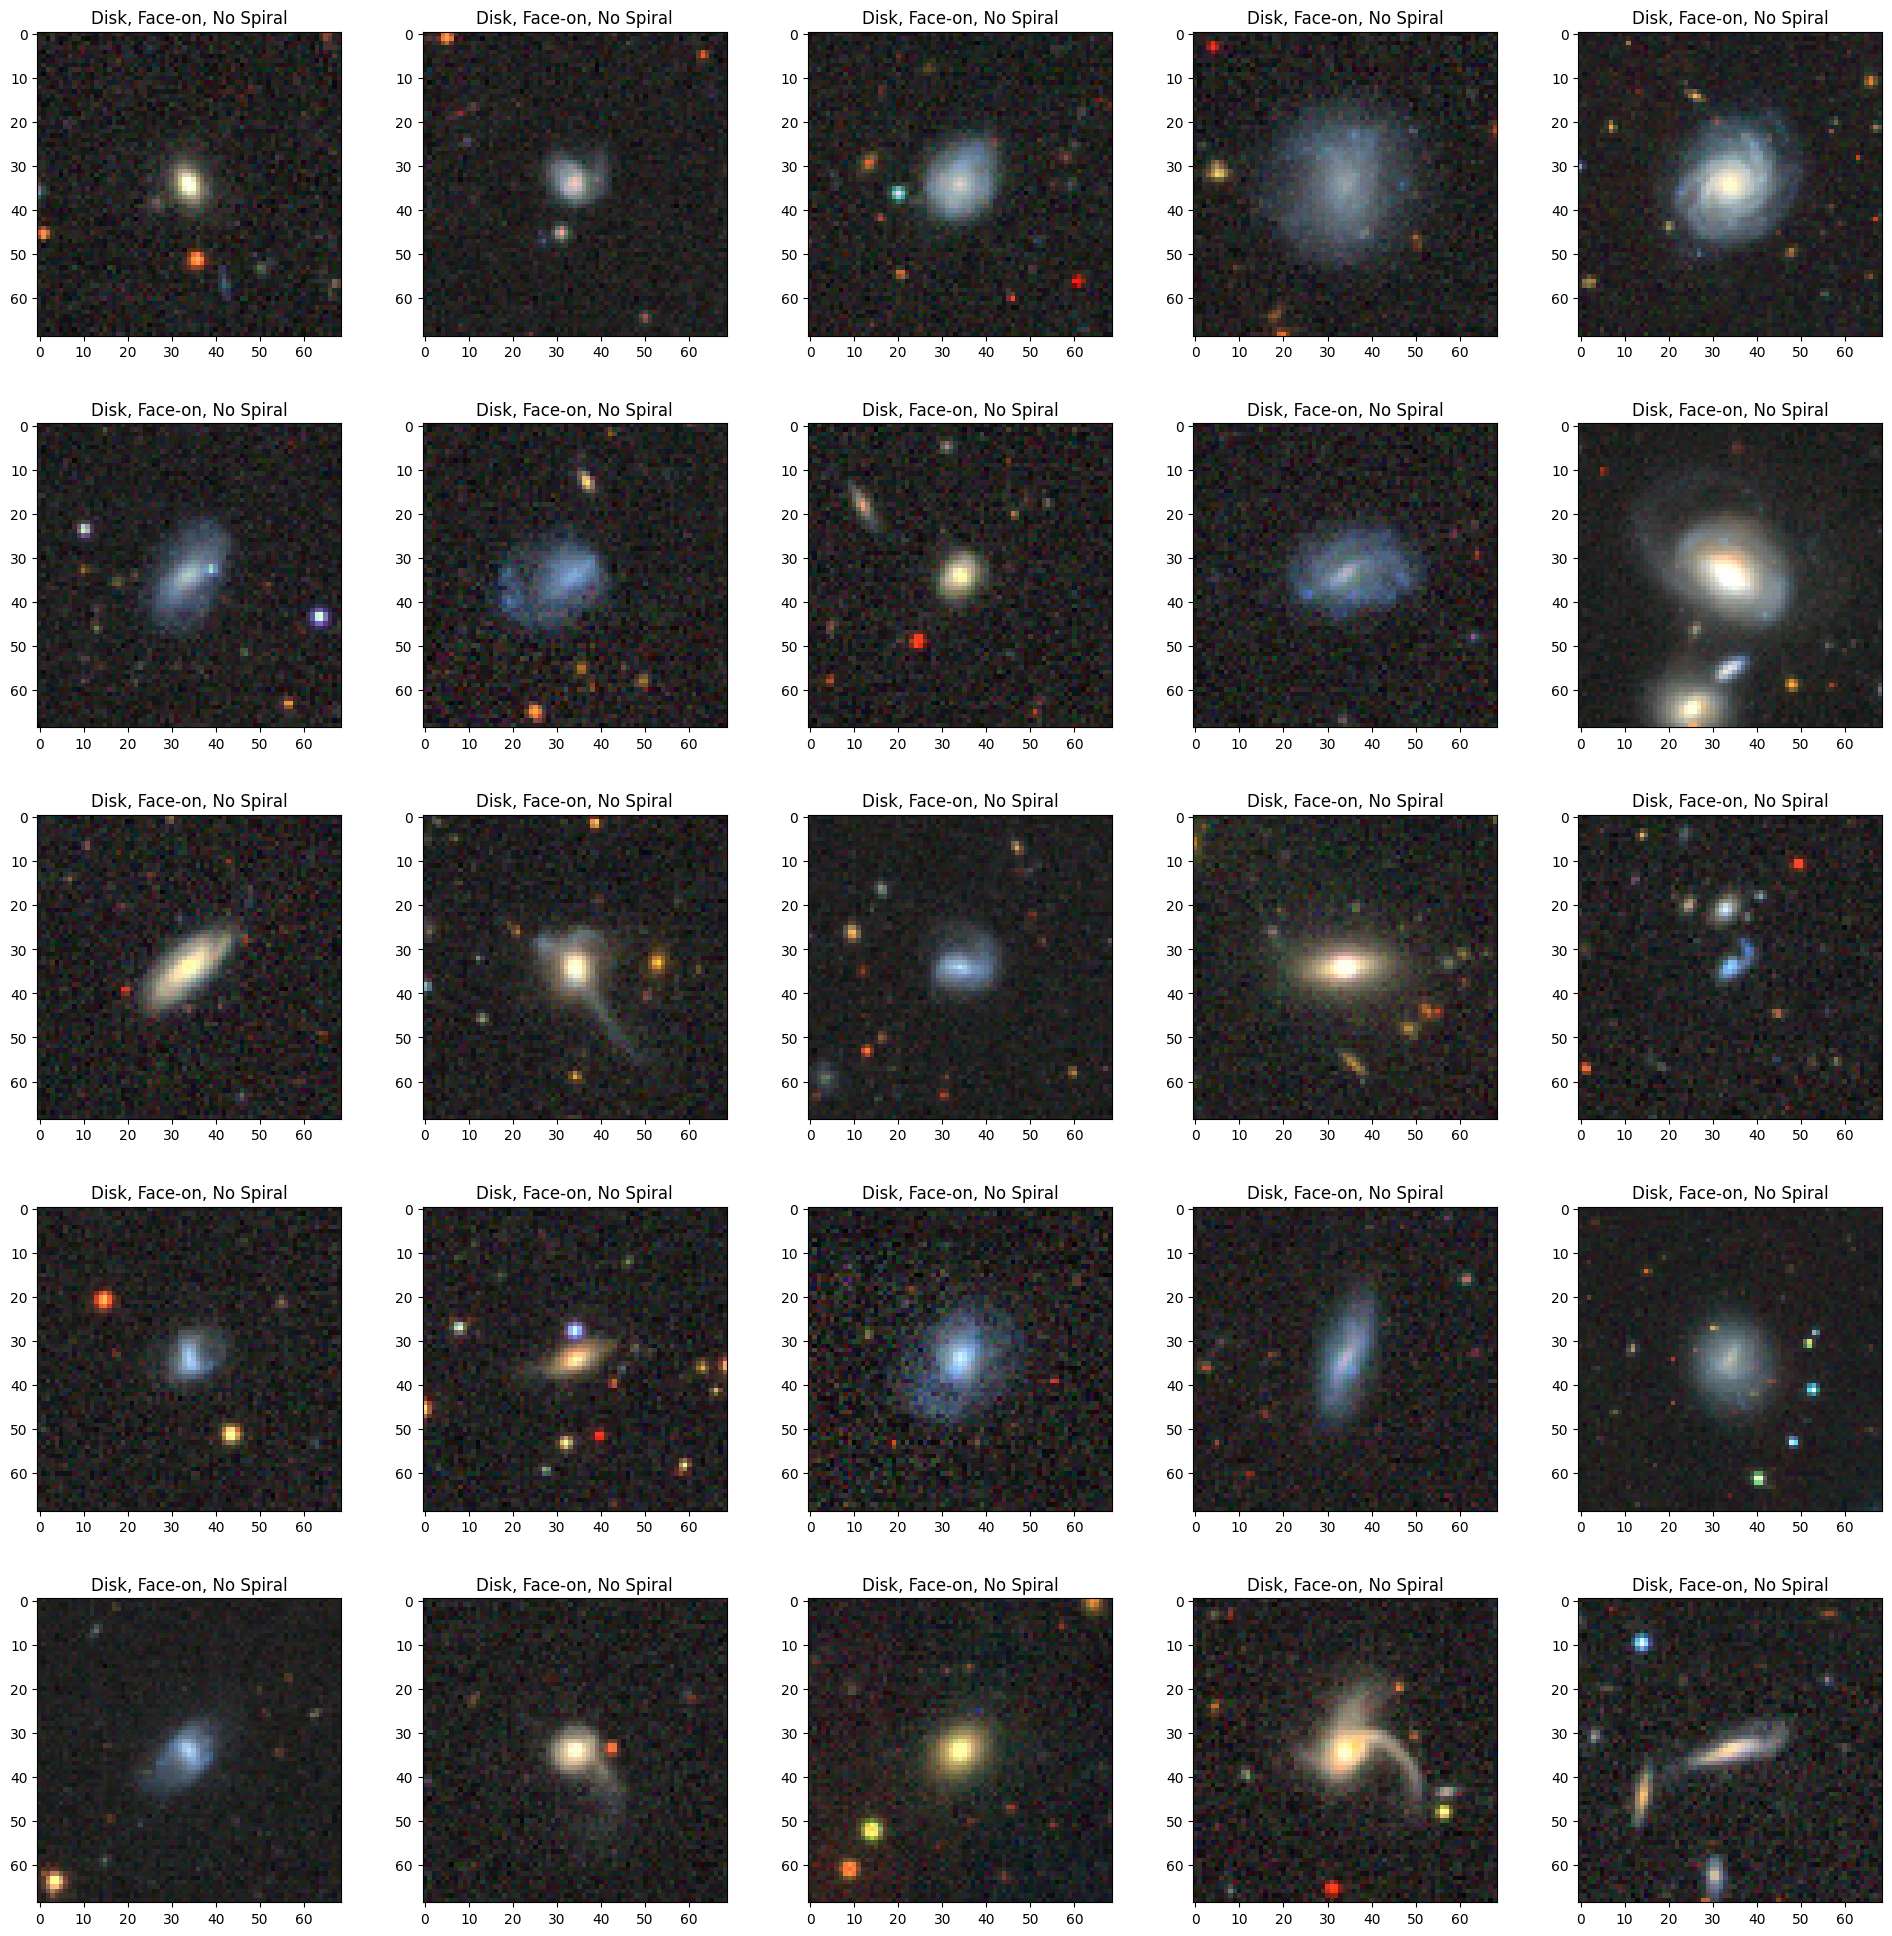

Epoch 1/10
31/31 [==============================] - 1s 6ms/step - loss: 0.0661 - accuracy: 0.9980 - lr: 0.0010
Epoch 2/10
31/31 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - lr: 0.0010
Epoch 3/10
31/31 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - lr: 1.0000e-06
Epoch 4/10
31/31 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - lr: 1.0000e-09
Epoch 5/10
31/31 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - lr: 1.0000e-12
Epoch 6/10
31/31 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - lr: 1.0000e-15
Epoch 7/10
31/31 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - lr: 1.0000e-18
Epoch 8/10
31/31 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - lr: 1.0000e-21
Epoch 9/10
31/31 [==============================] - 0s 4ms/s

KeyboardInterrupt: 

In [ ]:
!pip install -q astroNN
!pip install -q tensorflow
!pip install -q tensorflow_probability
!pip install -q git+https://github.com/henrysky/astroNN.git

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from astroNN.datasets import galaxy10
from tensorflow.image import resize

# Function to generate batches
def generate_batches(x, y, batch_size):
    num_samples = len(x)
    num_batches = num_samples // batch_size

    while True:
        # Shuffle the data for each epoch
        indices = np.arange(num_samples)
        np.random.shuffle(indices)

        for batch_index in range(num_batches):
            batch_start = batch_index * batch_size
            batch_end = (batch_index + 1) * batch_size
            batch_indices = indices[batch_start:batch_end]

            yield x[batch_indices], y[batch_indices]

# Assuming you have a function to load your data (replace this with your actual data loading function)
def load_data():
    # ... your data loading logic here
    return images, labels

# Load data using batches
images, labels = load_data()

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.01, random_state=42)

# Resize training images to the expected input shape
x_train_resized = np.array([resize(image, (69, 69)).numpy() for image in x_train])

# Normalize pixel values
x_train_resized = x_train_resized / 255.0

# Define the features list
features = ['Disk, Face-on, No Spiral', 'Smooth, Completely round', 'Smooth, in-between round', 'Smooth, Cigar shaped', 'Disk, Edge-on, Rounded Bulge', 'Disk, Edge-on, Boxy Bulge',
            'Disk, Edge-on, No Bulge','Disk, Face-on, Tight Spiral', 'Disk, Face-on, Medium Spiral', 'Disk, Face-on, Loose Spiral']

# Display sample resized images with labels
fig_resized = plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train_resized[i])
    plt.title(features[y_train[i]])
    fig_resized.tight_layout(pad=3.0)
plt.show()

# Use the resized training data for the baseline model
model = Sequential()
model.add(Flatten(input_shape=(69, 69, 3)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model_optimizer = Adam(learning_rate=0.001)  # Fix for the warning
model.compile(optimizer=model_optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])
reduceLR = ReduceLROnPlateau(monitor='accuracy', factor=.001, patience=1, min_delta=0.01, mode="auto")
lol = model.fit(x_train_resized, y_train, epochs=10, callbacks=[reduceLR])

# LeNet-5 model
model2 = Sequential()
model2.add(Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(69, 69, 3)))
model2.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation='tanh'))
model2.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(Flatten())
model2.add(Dense(units=64, activation='tanh'))
model2.add(Dense(units=10, activation='softmax'))

model_optimizer = Adam(learning_rate=0.001)  # Fix for the warning
reduceLR = ReduceLROnPlateau(monitor='accuracy', factor=.001, patience=1, min_delta=0.01, mode="auto")

model2.compile(optimizer=model_optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])

# Use the data generator for training
batch_size = 16
model2.fit(generate_batches(x_train_resized, y_train, batch_size), steps_per_epoch=len(x_train_resized) // batch_size, epochs=10, callbacks=[reduceLR])

# Use the data generator for testing
test_steps = (len(x_test) + batch_size - 1) // batch_size
test_data_generator = generate_batches(x_test, y_test, batch_size)
predict = model2.predict(test_data_generator).argmax(axis=1)

for i in range(10):
    print("Actual:", features[y_test[i]])
    print("Prediction:", features[np.argmax(predict[i])])
    print("-----")
    print()